<a href="https://colab.research.google.com/github/Mishabz4321/MACHINE-LEARNING/blob/main/Intelligent_IDS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error, roc_curve, classification_report,auc)
#Import library
from IPython.display import Image
# Load image from local storage
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns', None)
df= pd.read_csv('/content/drive/MyDrive/Intelligent IDS/kddtrain.csv', header=None)
test= pd.read_csv('/content/drive/MyDrive/Intelligent IDS/kddtest.csv', header= None)

In [ ]:
#loading dataframe
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,0,0,1,1,1,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,0,1,1,1,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,0,1,1,1,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,0,1,1,1,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,0,1,1,1,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
494016,0,0,1,1,1,310,1881,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,5,0.00,0.00,0.0,0.0,1.0,0.0,0.40,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0
494017,0,0,1,1,1,282,2286,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0
494018,0,0,1,1,1,203,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,18,0.17,0.11,0.0,0.0,1.0,0.0,0.17,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0
494019,0,0,1,1,1,291,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,12,0.00,0.00,0.0,0.0,1.0,0.0,0.17,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0
494020,0,0,1,1,1,219,1234,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,35,0.00,0.00,0.0,0.0,1.0,0.0,0.14,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0


In [ ]:
# shape of dataset
print('No.of data points:', df.shape[0])
print('No.of variables:', df.shape[1])

No.of data points: 494021
No.of variables: 42


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       494021 non-null  int64  
 1   1       494021 non-null  int64  
 2   2       494021 non-null  int64  
 3   3       494021 non-null  int64  
 4   4       494021 non-null  int64  
 5   5       494021 non-null  int64  
 6   6       494021 non-null  int64  
 7   7       494021 non-null  int64  
 8   8       494021 non-null  int64  
 9   9       494021 non-null  int64  
 10  10      494021 non-null  int64  
 11  11      494021 non-null  int64  
 12  12      494021 non-null  int64  
 13  13      494021 non-null  int64  
 14  14      494021 non-null  int64  
 15  15      494021 non-null  int64  
 16  16      494021 non-null  int64  
 17  17      494021 non-null  int64  
 18  18      494021 non-null  int64  
 19  19      494021 non-null  int64  
 20  20      494021 non-null  int64  
 21  21      49

In [ ]:
# checking for null values
df.isnull().sum().any()

False

* No null values in the given dataset

## Exploratory Data Analysis

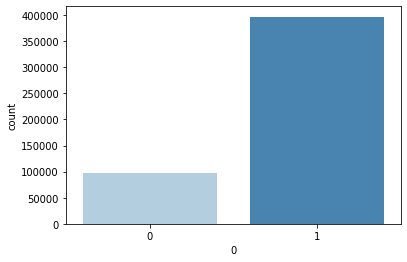

In [ ]:
# first column is our target variables
# Analyzing Target variable
sns.countplot(df[0], palette='Blues');

In [ ]:
print('No.of data in class 0:', df.groupby(0).size()[0])
print('No.of data in class 1:', df.groupby(0).size()[1])

No.of data in class 0: 97278
No.of data in class 1: 396743


* Dataset seems imbalanced

(42.5, -0.5)

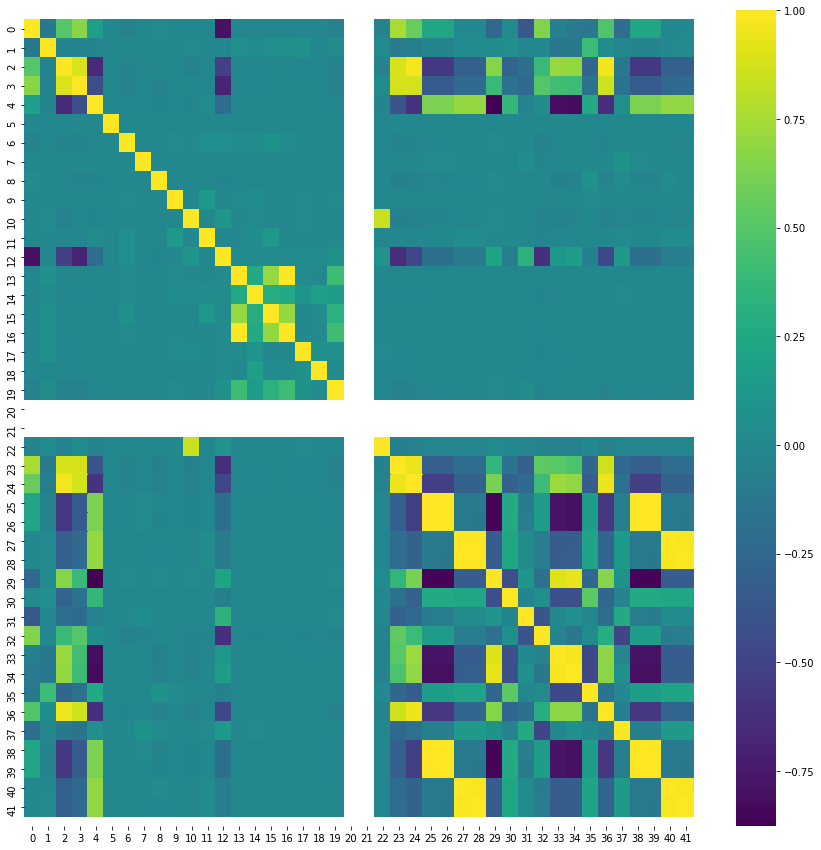

In [ ]:
plt.figure(figsize=(15,15))
ax= sns.heatmap(df.corr(min_periods=1), annot=False, cmap='viridis')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
print(df[20].value_counts())
print(df[21].value_counts())

0    494021
Name: 20, dtype: int64
0    494021
Name: 21, dtype: int64


* The variables 20 and 21 have no variance or standard deviation in them. So the correlation coefficient gives NaN values and thus appears white color

* Some variables have extreme correlation (both +ve and -ve) with other variables

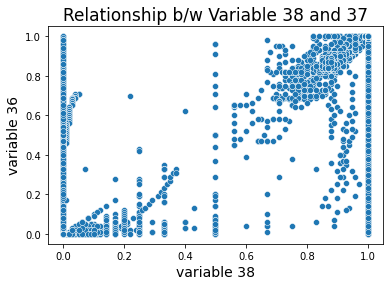

In [ ]:
sns.scatterplot(x=df[27], y=df[40])
plt.title('Relationship b/w Variable 38 and 37', size=17)
plt.xlabel('variable 38', size=14)
plt.ylabel('variable 36', size=14)
plt.show()

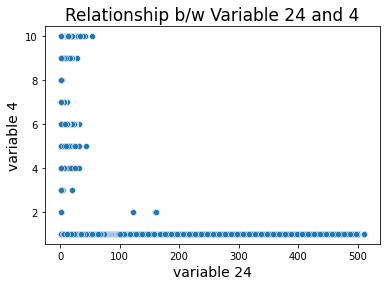

In [ ]:
sns.scatterplot(x=df[24], y=df[4])
plt.title('Relationship b/w Variable 24 and 4', size=17)
plt.xlabel('variable 24', size=14)
plt.ylabel('variable 4', size=14)
plt.show()

* Some columns contain descrete values

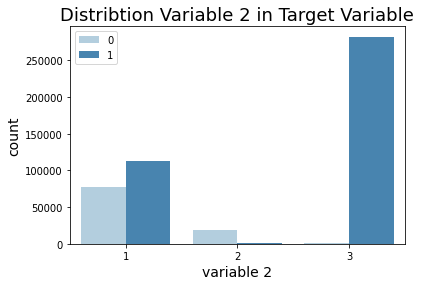

In [ ]:
sns.countplot(df[2], palette='Blues', hue=df[0])
plt.title('Distribtion Variable 2 in Target Variable', size=18)
plt.xlabel('variable 2', size=14)
plt.ylabel('count', size=14)
plt.show()

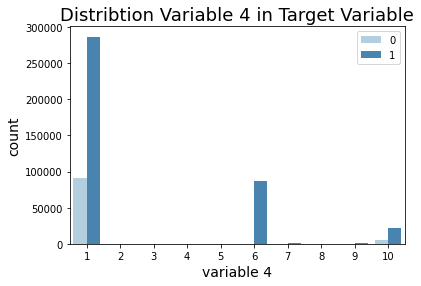

In [ ]:
sns.countplot(df[4], palette='Blues',hue=df[0])
plt.title('Distribtion Variable 4 in Target Variable', size=18)
plt.xlabel('variable 4', size=14)
plt.ylabel('count', size=14)
plt.show()

* Analyzing variable 2, category 3 has more number of class 1 (Intrution)
* Analyzing variable 4, category 1 has more number of class 1 (Intrution)

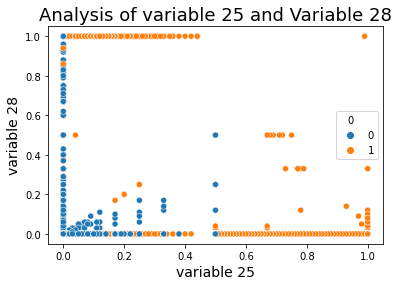

In [ ]:
sns.scatterplot(df[25], df[28], hue=df[0])
plt.title('Analysis of variable 25 and Variable 28', size=18)
plt.xlabel('variable 25', size=14)
plt.ylabel('variable 28', size=14)
plt.show()

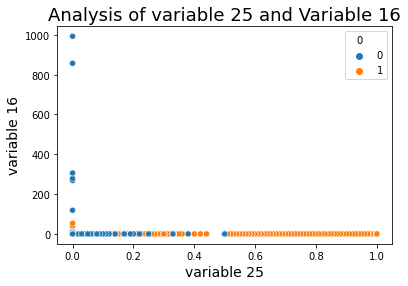

In [ ]:
sns.scatterplot(df[25], df[16], hue=df[0])
plt.title('Analysis of variable 25 and Variable 16', size=18)
plt.xlabel('variable 25', size=14)
plt.ylabel('variable 16', size=14)
plt.show()

In [ ]:
# unique values in each variable
df.nunique()

0         2
1      2495
2         3
3        66
4        10
5      3300
6     10725
7         2
8         3
9         4
10       22
11        6
12        2
13       23
14        2
15        3
16       20
17       18
18        3
19        7
20        1
21        1
22        2
23      490
24      470
25       92
26       51
27       77
28       51
29       99
30       78
31       64
32      256
33      256
34      101
35      101
36      101
37       65
38      100
39       72
40      101
41      101
dtype: int64

In [ ]:
corr_with_target=pd.DataFrame(df.corr()[0])
corr_with_target.columns=['Correlation with Target']
corr_with_target.sort_values(by=['Correlation with Target'],ascending=False)

,Correlation with Target
0,1.000000
23,0.752978
3,0.663713
32,0.642110
24,0.566829
2,0.497755
36,0.481458
39,0.227975
25,0.227739
38,0.227205


* Among all variables, variable 23 is highly correlated with target and followed by variable 3

## Outlier Detection and Removal

In [ ]:
# Summary statistics
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
count,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.0,494021.0,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,0.803089,47.979302,2.189338,38.995435,2.391617,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,0.000111,0.000036,0.011352,0.001083,0.000109,0.001008,0.0,0.0,0.001387,332.285690,292.906557,0.176687,0.176609,0.057433,0.057719,0.791547,0.020982,0.028997,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,0.397665,707.746472,0.960704,19.698954,2.649054,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,0.010551,0.007793,2.012718,0.096416,0.011020,0.036482,0.0,0.0,0.037211,213.147412,246.322817,0.380717,0.381017,0.231623,0.232147,0.388189,0.082205,0.142397,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,24.000000,1.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,117.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,3.000000,54.000000,1.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,510.000000,510.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,3.000000,54.000000,1.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,511.000000,511.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,58329.000000,3.000000,70.000000,10.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,1.000000,2.000000,993.000000,28.000000,2.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* High variance is observed for variables

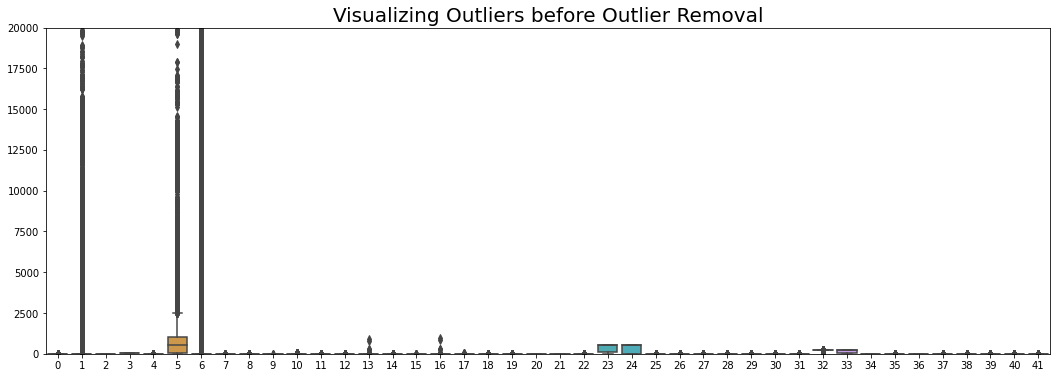

In [ ]:
plt.figure(figsize=(18,6))
sns.boxplot(data=df)
plt.ylim(-2, 20000)
plt.title('Visualizing Outliers before Outlier Removal',size=20);

* Outliers are present in most of the columns
* Large number of extreme values are there in the columns like 1, 5 and 6

### Outlier Removal by Percentile Metthod

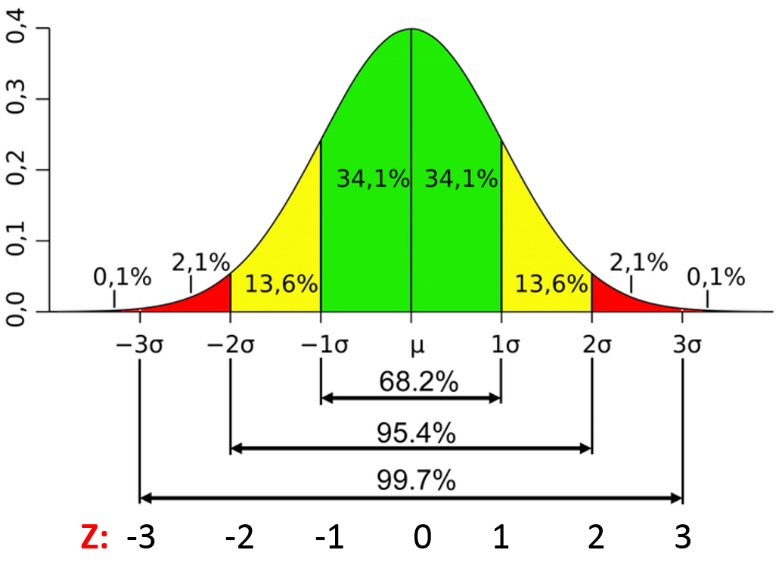

In [ ]:
Image(filename = "Normal Distribution deviations.png", width = 500, height = 300)

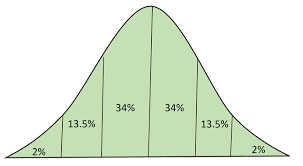

In [ ]:
Image(filename = "quantile.png", width = 500, height = 300)

In [ ]:
def remove_outlier(df_in, col_name):
    upper_threshold = df_in[col_name].quantile(0.999)
    df_out = df_in.loc[df_in[col_name] < upper_threshold]
    return df_out

In [ ]:
# # Removing Outliers from column 1, 5 and 6
df_no_outlier= remove_outlier(df, 1)
df_no_outlier= remove_outlier(df_no_outlier, 5)
df_no_outlier= remove_outlier(df_no_outlier, 6)

In [ ]:
df_no_outlier[1].quantile(0.999)

6747.19000000041

In [ ]:
print('Data points before outlier removal:', df.shape[0])
print('Data points after outlier removal:', df_no_outlier.shape[0])

Data points before outlier removal: 494021
Data points after outlier removal: 490711


(-2.0, 20000.0)

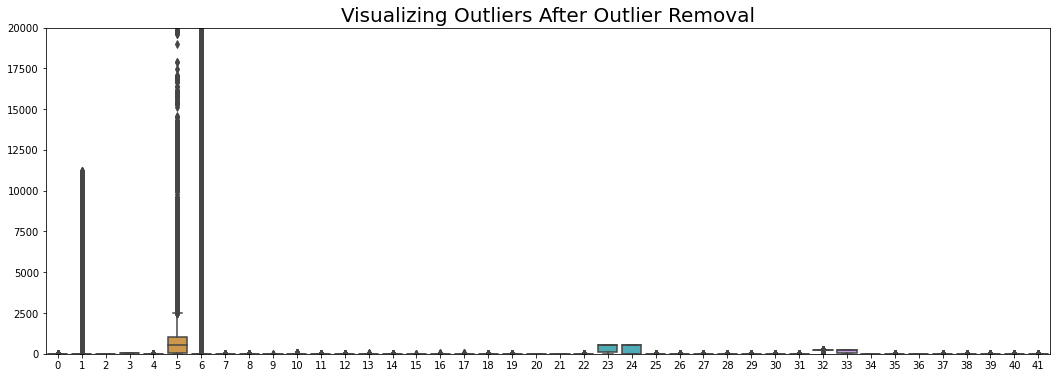

In [ ]:
plt.figure(figsize=(18,6))
sns.boxplot(data=df_no_outlier)
plt.title('Visualizing Outliers After Outlier Removal',size=20)
plt.ylim(-2, 20000)


In [ ]:
print('Summary Statistics before Outlier Removal')
df[[1,5,6]].describe()

Summary Statistics before Outlier Removal


,1,5,6
count,494021.000000,4.940210e+05,4.940210e+05
mean,47.979302,3.025610e+03,8.685324e+02
std,707.746472,9.882181e+05,3.304000e+04
min,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,4.500000e+01,0.000000e+00
50%,0.000000,5.200000e+02,0.000000e+00
75%,0.000000,1.032000e+03,0.000000e+00
max,58329.000000,6.933756e+08,5.155468e+06


In [ ]:
print('Summary Statistics after Outlier Removal')
df_no_outlier[[1,5,6]].describe()

Summary Statistics after Outlier Removal


,1,5,6
count,490711.000000,490711.000000,490711.000000
mean,29.874409,642.310421,461.445937
std,385.735628,964.981405,2364.065884
min,0.000000,0.000000,0.000000
25%,0.000000,44.000000,0.000000
50%,0.000000,520.000000,0.000000
75%,0.000000,1032.000000,0.000000
max,11235.000000,54060.000000,43262.000000


### Splitting Data into Features and Target

In [ ]:
# Defining Features only -- discarding 1st column
X = df_no_outlier.iloc[:,1:42]

# Defining Target only -- Selecting 1st column only
y = df_no_outlier.iloc[:,0]

In [ ]:
X.shape, y.shape

((490711, 41), (490711,))

In [ ]:
import plotly.express as px
fig= px.pie(data_frame=df,names=df[0], title='Analysis of Classes in Target')
fig.show()

In [ ]:
df_one= df[df[0]==1]

In [ ]:
df_one.shape

(396743, 42)

In [ ]:
df_zero= df[df[0]==0]

In [ ]:
df_zero.shape[0]

97278

In [ ]:
df_one_new= df_one.sample(df_zero.shape[0])

In [ ]:
df_new= pd.concat([df_one_new, df_zero], axis=0)

In [ ]:
df_new[0].value_counts()

1    97278
0    97278
Name: 0, dtype: int64

* Imbalanced datasets are those where there is a severe skew in the class distribution, such as 1:100 or 1:1000 examples in the minority class to the majority class.
* This bias in the training dataset can influence many machine learning algorithms, leading some to ignore the minority class entirely.

## Balancing Dataset by undersampling
* Randomly resampling an imbalanced dataset by deleting examples from the majority class

In [ ]:
import imblearn
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# summarize class distribution
print(Counter(y))
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({1: 394433, 0: 96278})
Counter({0: 96278, 1: 96278})


* Initially there were 396743 data in class 1 and 96278 in class 0
* Now we transformed data to have 96278 data in both classes

### Split Data for Training and Testing Model

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X_over, y_over, test_size=0.2, random_state=1)
print('No.of training data:', X_train.shape[0])
print('No.of testing data:',X_test.shape[0])

No.of training data: 154044
No.of testing data: 38512


## Normalizing Data
* Normalize samples individually to unit norm

In [ ]:
scaler= Normalizer().fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [ ]:
pd.DataFrame(X_train_scaled, columns=X.columns).head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,0.000000,0.002287,0.041172,0.000762,0.786837,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.389606,0.389606,0.0,0.0,0.000000,0.000000,0.000762,0.000000,0.000000,0.194422,0.194422,0.000762,0.000000,0.000762,0.0,0.0,0.0,0.000000,0.000000
1,0.000000,0.022608,0.406936,0.007536,0.226076,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007536,0.007536,0.0,0.0,0.000000,0.000000,0.007536,0.000000,0.000000,0.625476,0.625476,0.007536,0.000000,0.007536,0.0,0.0,0.0,0.000000,0.000000
2,0.930867,0.003978,0.057682,0.001989,0.290399,0.208848,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007956,0.003978,0.0,0.0,0.000000,0.000000,0.000995,0.000995,0.000000,0.045748,0.003978,0.000179,0.000855,0.001034,0.0,0.0,0.0,0.000000,0.000000
3,0.000000,0.000403,0.000403,0.000403,0.089430,0.985337,0.0,0.0,0.0,0.0,0.0,0.000403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001611,0.002417,0.0,0.0,0.000000,0.000000,0.000403,0.000000,0.000133,0.102723,0.102723,0.000403,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
4,0.000000,0.003471,0.083308,0.034712,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454721,0.027769,0.0,0.0,0.003471,0.003471,0.000208,0.000208,0.000000,0.885145,0.027769,0.000104,0.000208,0.000000,0.0,0.0,0.0,0.003471,0.003471


* Now we see that each sample is normalized to unit form

# Training Model

In [ ]:
# Initializing Some model
lr= LogisticRegression()
svc= SVC()
rf= RandomForestClassifier()
adaboost= AdaBoostClassifier()

In [ ]:
def model_accuracy(models):
    model_name= []
    accuracy=[]
    for model in models:
        model.fit(X_train_scaled, y_train)
        model.predict(X_test_scaled)
        modelname= model
        score= model.score(X_test_scaled, y_test)
        model_name.append(modelname)
        accuracy.append(score)
    return model_name, accuracy

In [ ]:
%time
models= [lr, svc, rf, adaboost]
model_dataframe= pd.DataFrame(model_accuracy(models)).T
model_dataframe.columns= ['model_name', 'accuracy']
model_dataframe['model_name']= ['logistic_regression','svc', 'random_forest','adaboost']

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


In [ ]:
model_dataframe

,model_name,accuracy
0,logistic_regression,0.992236
1,svc,0.9973
2,random_forest,0.999533
3,adaboost,0.999039


Among these models, SVM performs best followed by Adaboost

## Analysing Random Forest and Adaboost

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, RandomizedSearchCV
models_for_checking={'rf':RandomForestClassifier(),
       'adaboost':AdaBoostClassifier()}

cv= StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
scores= []
for model_name, model in models_for_checking.items():
    score= cross_val_score(estimator=model, X=X_over,y=y_over, cv=cv, error_score='raise', verbose=2)
    scores.append({
        'model':model_name,
        'score':np.mean(score),
        'variance':np.std(score)})

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   9.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.5s remaining:    0.0s


[CV] ................................................. , total=   9.8s
[CV]  ................................................................
[CV] ................................................. , total=   9.3s
[CV]  ................................................................
[CV] ................................................. , total=   9.6s
[CV]  ................................................................
[CV] ................................................. , total=   9.3s
[CV]  ................................................................
[CV] ................................................. , total=   9.6s
[CV]  ................................................................
[CV] ................................................. , total=   9.6s
[CV]  ................................................................
[CV] ................................................. , total=   9.6s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   9.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.3s remaining:    0.0s


[CV] ................................................. , total=   9.2s
[CV]  ................................................................
[CV] ................................................. , total=   9.2s
[CV]  ................................................................
[CV] ................................................. , total=   9.4s
[CV]  ................................................................
[CV] ................................................. , total=   9.5s
[CV]  ................................................................
[CV] ................................................. , total=   9.3s
[CV]  ................................................................
[CV] ................................................. , total=   9.4s
[CV]  ................................................................
[CV] ................................................. , total=   9.6s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.6min finished


In [ ]:
model_selected_df= pd.DataFrame(scores, columns=['model','score', 'variance'])
model_selected_df

,model,score,variance
0,rf,0.999709,0.000099
1,adaboost,0.998759,0.000176


Comparing random forest and adaboost performances, random forest shows a little bit higher performance than that of adaboost

## Testing our Model

In [ ]:
predictions= rf.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
class_report= classification_report(y_test, predictions)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19408
           1       1.00      1.00      1.00     19104

    accuracy                           1.00     38512
   macro avg       1.00      1.00      1.00     38512
weighted avg       1.00      1.00      1.00     38512



## Plotting Confusion Matrix

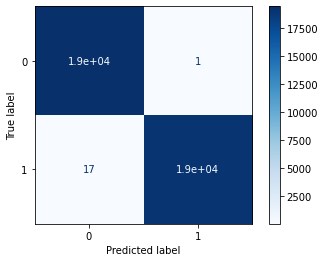

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf, X_test_scaled, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

plt.show()

## Plotting ROC-AUC Curve

In [ ]:
import sklearn.metrics as metrics
probs = rf.predict_proba(X_test_scaled)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

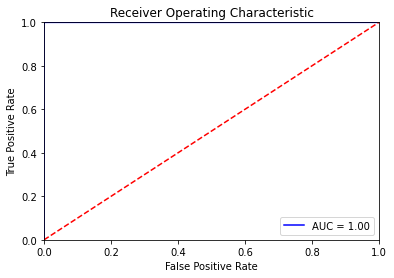

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Normalizing entire train data
X_over_scaled= scaler.fit_transform(X_over)

In [ ]:
# Model initialization and training on entire data
rf_final= RandomForestClassifier()
rf_final.fit(X_over_scaled,y_over)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Save model

In [ ]:
# saving model rf
import joblib
filename_rf= 'rf.sav'
joblib.dump(rf,filename_rf)

['rf.sav']

In [ ]:
# Saving model rf_final
import joblib
filename= 'rf_final.sav'
joblib.dump(rf_final,filename)

['rf_final.sav']

## Testing our Model on Test data

In [ ]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,0,0,2,24,1,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
1,0,0,2,24,1,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
2,0,0,2,24,1,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
3,1,0,2,24,1,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
4,1,0,2,24,1,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Split to Features and Target
X= test.iloc[:,1:42]
y= test.iloc[:,0]

In [ ]:
# Normalize X
X_scaled= scaler.fit_transform(X)

In [ ]:
# loading model rf_final
loaded_model_rf_final = joblib.load(filename)

In [ ]:
loaded_model_rf_final

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Prediction on test data ---> X_scaled
predictions_testdata= loaded_model_rf_final.predict(X_scaled)

In [ ]:
# Model accuracy on test data
loaded_model_rf_final.score(X_scaled,y)

0.924495786566526

In [ ]:
print(classification_report(predictions_testdata, y))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84     83515
           1       0.91      1.00      0.95    227514

    accuracy                           0.92    311029
   macro avg       0.95      0.86      0.89    311029
weighted avg       0.93      0.92      0.92    311029



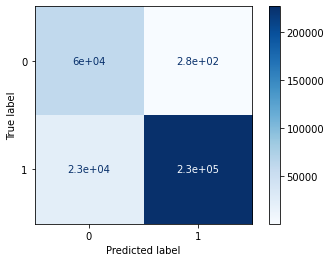

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(loaded_model_rf_final, X_scaled, y,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

plt.show()

In [ ]:
# loading model rf
load_model_rf= joblib.load(filename_rf)

In [ ]:
# Prediction on test data ---> X_scaled
predictions_testdata_rf= load_model_rf.predict(X_scaled)

In [ ]:
# model accuracy on test data
load_model_rf.score(X_scaled,y)

0.9244829260294056

In [ ]:
print(classification_report(predictions_testdata_rf, y))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84     83553
           1       0.91      1.00      0.95    227476

    accuracy                           0.92    311029
   macro avg       0.95      0.86      0.89    311029
weighted avg       0.93      0.92      0.92    311029



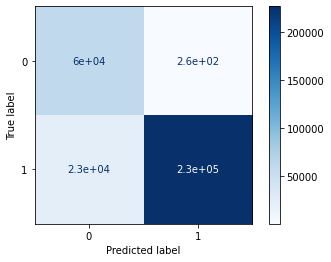

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(load_model_rf, X_scaled, y,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

plt.show()